In [1]:
import matplotlib.pyplot as plt
import base

LENGTH = 15

In [2]:
def get_each_user_mean_length(dataset):
    grouped_users = base.get_dataset_with_browsing_id_and_group_by_user(dataset)
    users_mean_length = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        grouped_targets = group.groupby('target_id')
        lengths = []
        for target, target_group in grouped_targets:
            lengths.append(target_group.shape[0])
        users_mean_length[username] = sum(lengths) / len(lengths)
    return users_mean_length

def get_each_user_success_rate(dataset):
    grouped_users = base.get_dataset_with_browsing_id_and_group_by_user(dataset)
    users_success = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        grouped_targets = group.groupby('target_id')
        success = 0
        all = 0
        for target, target_group in grouped_targets:
            if target_group[target_group['guess_id'] == target_group['target_id']].empty:
                all += 1
            else:
                all += 1
                success += 1
        users_success[username] = success / all
    return users_success

def get_each_user_text_ratio(dataset):
    grouped_users = base.get_dataset_with_browsing_id_and_group_by_user(dataset)
    users_text_rate = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        grouped_targets = group.groupby('target_id')
        text_queries_rate = []
        for target, target_group in grouped_targets:
            text = target_group[target_group['type'] == 'text'].shape[0]
            feedback = target_group[target_group['type'] == 'feedback'].shape[0]
            if text + feedback != 0:
                text_queries_rate.append(text / (text + feedback))
            else:
                text_queries_rate.append(0)
        users_text_rate[username] = sum(text_queries_rate) / len(text_queries_rate)
    return users_text_rate


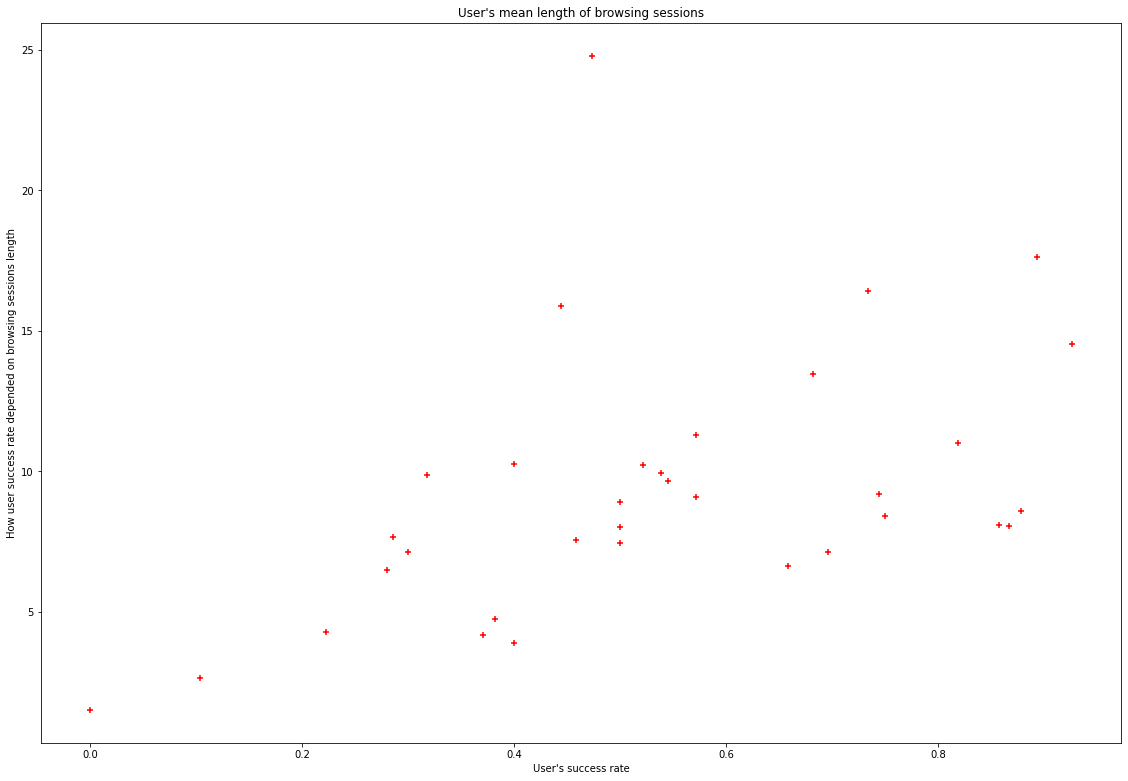

<Figure size 1440x1440 with 0 Axes>

In [3]:
%matplotlib inline
fig, ax = plt.subplots()

user_mean_len = get_each_user_mean_length("result_collection_browsing_id.csv")
user_success_rate = get_each_user_success_rate("result_collection_browsing_id.csv")
for user, mean_len in user_mean_len.items():
    plt.scatter(user_success_rate[user], user_mean_len[user], c='red', marker='+')

plt.title("User's mean length of browsing sessions")
plt.xlabel("User's success rate")
plt.ylabel('How user success rate depended on browsing sessions length')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

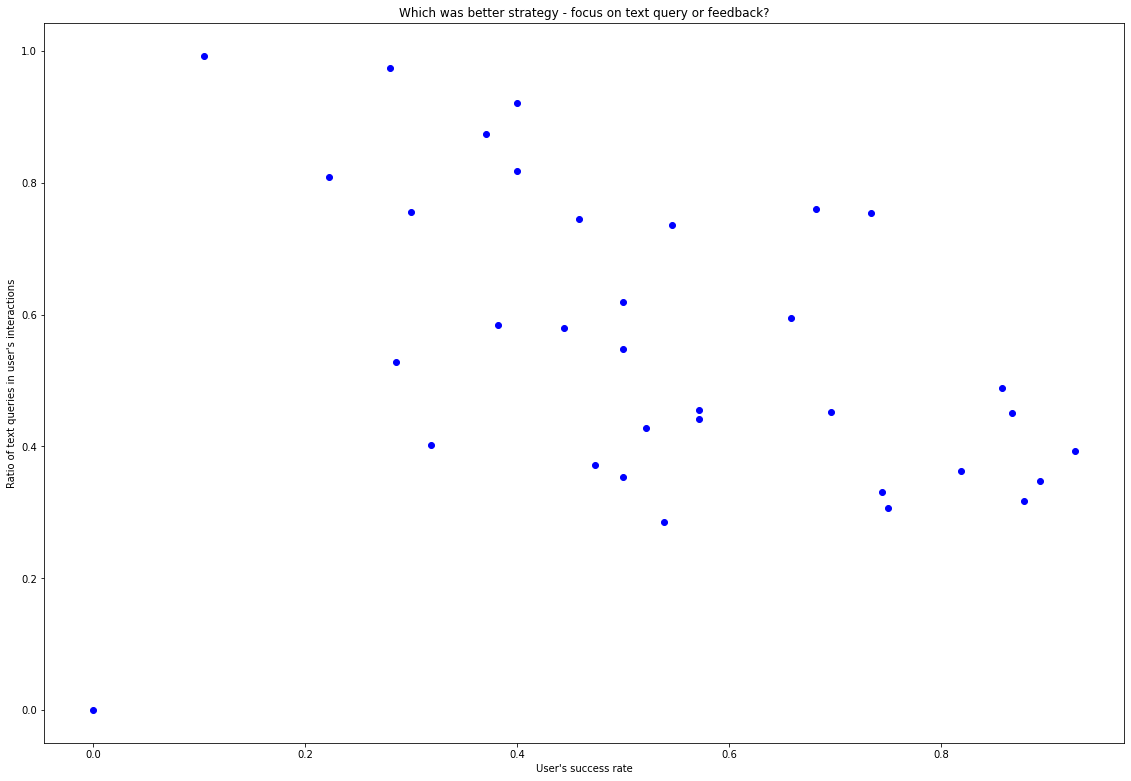

<Figure size 1440x1440 with 0 Axes>

In [4]:
%matplotlib inline
fig, ax = plt.subplots()

queries_ratio = get_each_user_text_ratio("result_collection_browsing_id.csv")
for user, mean_len in queries_ratio.items():
    plt.scatter(user_success_rate[user], queries_ratio[user], c='blue')
plt.title("Which was better strategy - focus on text query or feedback?")
plt.xlabel("User's success rate")
plt.ylabel("Ratio of text queries in user's interactions")

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

In [5]:
# Add data points from constrained study (where we collected test data):

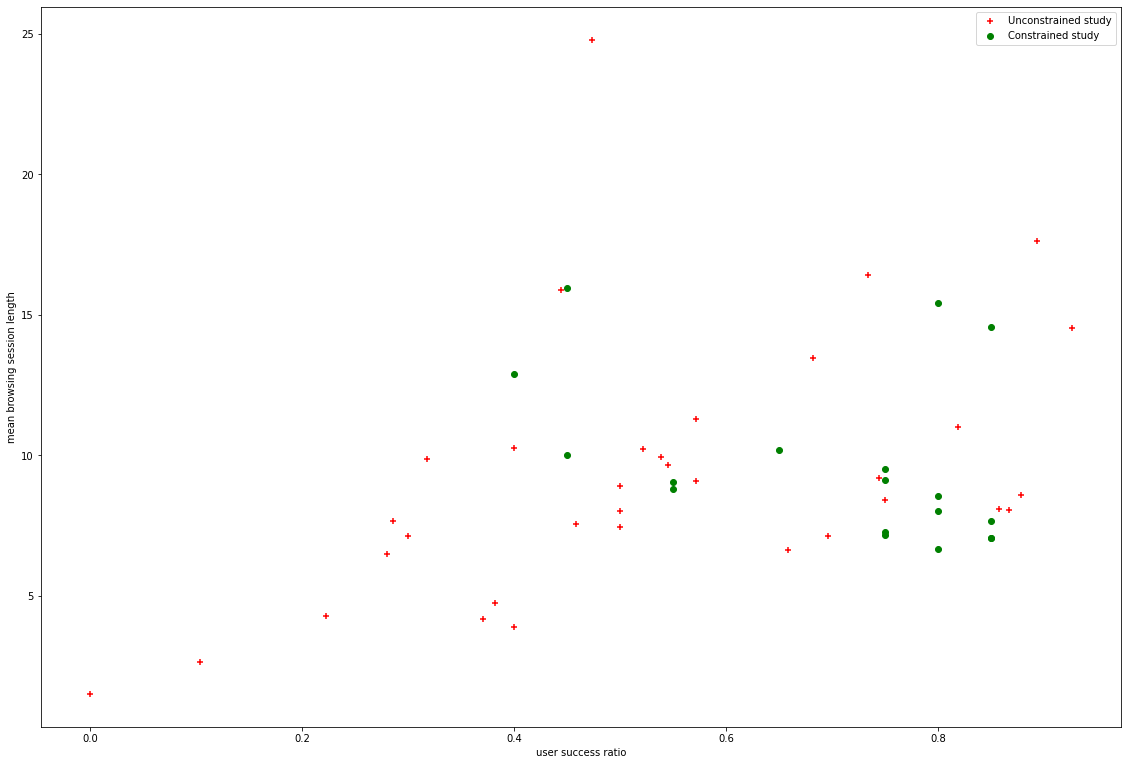

<Figure size 1440x1440 with 0 Axes>

In [8]:
%matplotlib inline
fig, ax = plt.subplots()

user_mean_len_validation = get_each_user_mean_length(dataset="result_collection_browsing_id_validation.csv")
user_success_rate_validation = get_each_user_success_rate(dataset="result_collection_browsing_id_validation.csv")

legend = True
for user, mean_len in user_mean_len.items():
    if legend:
        plt.scatter(user_success_rate[user], user_mean_len[user], c='red', marker='+', label="Unconstrained study")
        legend = False
    else:
        plt.scatter(user_success_rate[user], user_mean_len[user], c='red', marker='+')
legend = True
for user, mean_len in user_mean_len_validation.items():
    if legend:
        plt.scatter(user_success_rate_validation[user], user_mean_len_validation[user], c='green', marker='o',
                    label="Constrained study")
        legend = False
    else:
        plt.scatter(user_success_rate_validation[user], user_mean_len_validation[user], c='green', marker='o')
plt.legend()
plt.xlabel("user success ratio")
plt.ylabel("mean browsing session length")

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter


plt.show()

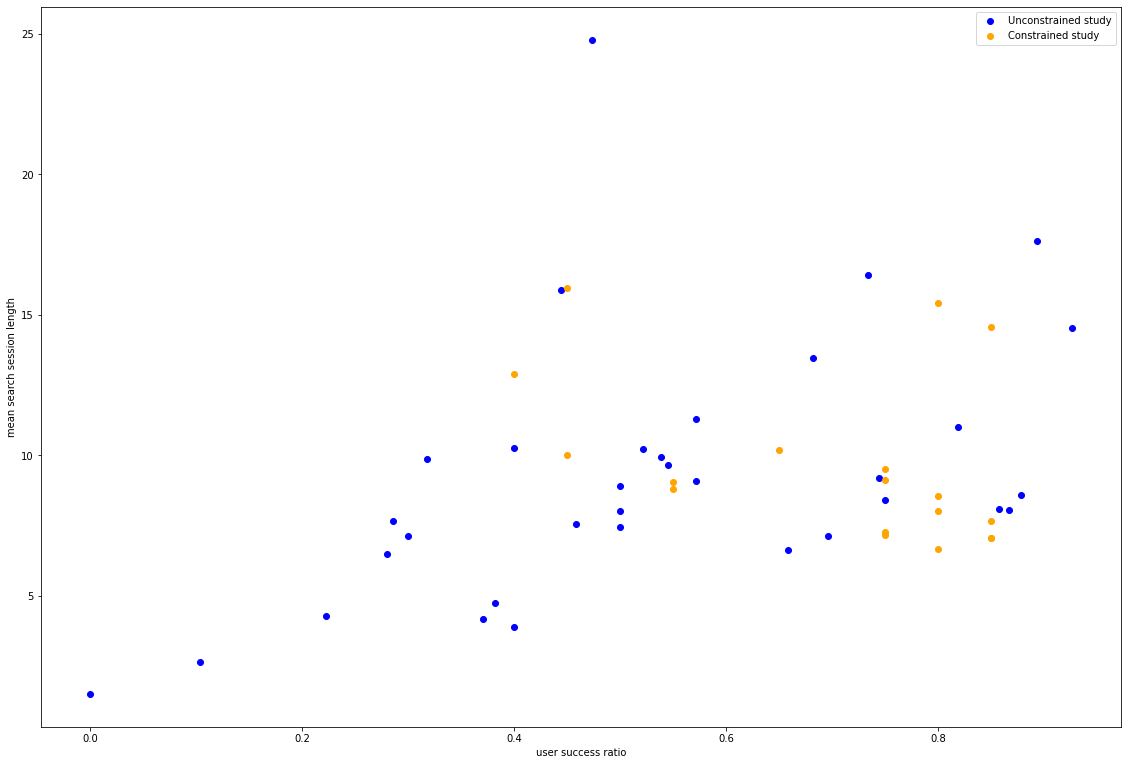

<Figure size 1440x1440 with 0 Axes>

In [11]:
%matplotlib inline
fig, ax = plt.subplots()

user_mean_len_validation = get_each_user_mean_length(dataset="result_collection_browsing_id_validation.csv")
user_success_rate_validation = get_each_user_success_rate(dataset="result_collection_browsing_id_validation.csv")

legend = True
for user, mean_len in user_mean_len.items():
    if legend:
        plt.scatter(user_success_rate[user], user_mean_len[user], c='blue', marker='o', label="Unconstrained study")
        legend = False
    else:
        plt.scatter(user_success_rate[user], user_mean_len[user], c='blue', marker='o')
legend = True
for user, mean_len in user_mean_len_validation.items():
    if legend:
        plt.scatter(user_success_rate_validation[user], user_mean_len_validation[user], c='orange', marker='o',
                    label="Constrained study")
        legend = False
    else:
        plt.scatter(user_success_rate_validation[user], user_mean_len_validation[user], c='orange', marker='o')
plt.legend()
plt.xlabel("user success ratio")
plt.ylabel("mean search session length")

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()